In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('project1.csv')

In [3]:
#View the first five rows of data from 
df.head()

,title,Location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,US,Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,NZ,Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),US,NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,US,Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,US,NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
#size of the data
df.shape

(17860, 18)

## Data Cleaning

In [5]:
#Find out the missing values
df.apply(lambda x:sum(x.isnull()))

title                      0
Location                 346
department             11539
salary_range           14993
company_profile         3305
description                1
requirements            2689
benefits                7193
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3467
required_experience     7042
required_education      8095
industry                4896
function                6450
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [6]:
#Missing value percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [7]:
missing_value_df

,percent_missing
title,0.000000
Location,1.937290
department,64.608063
salary_range,83.947368
company_profile,18.505039
description,0.005599
requirements,15.055991
benefits,40.274356
telecommuting,0.000000
has_company_logo,0.000000


The percentage of values missing for department and salary range is more than 60% so according to our thinking these variables are not at all useful for predicting the target variable so we are dropping these variables

In [8]:
df_new = df.drop(['department', 'salary_range'], axis = 1)

## Imputting the missing values using maximum value counts techniques

In [9]:
df_new['Location'].value_counts()

US    10650
GB     2380
GR      933
CA      457
DE      383
NZ      333
IN      276
AU      214
PH      132
NL      127
BE      117
IE      114
SG       80
HK       77
PL       76
IL       72
EE       72
FR       70
ES       66
AE       53
EG       52
SE       49
RO       46
DK       42
ZA       39
BR       36
IT       31
FI       29
PK       27
LT       23
      ...  
LV        6
CZ        6
NI        4
VN        4
TT        4
TW        4
VI        3
ZM        2
LK        2
AM        2
SK        2
KW        2
CL        2
IS        2
BD        2
TN        2
PE        1
CO        1
SI        1
CM        1
KH        1
GH        1
MA        1
KZ        1
AL        1
SD        1
SV        1
JM        1
UG        1
HR        1
Name: Location, Length: 90, dtype: int64

In [10]:
df_new= df_new.fillna(value={'Location':'US'})

In [11]:
df_new['employment_type'].value_counts()

Full-time    11604
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [12]:
df_new= df_new.fillna( value={'employment_type':'Full-time'})

In [13]:
df_new['required_education'].value_counts()

Bachelor's Degree                    5137
High School or equivalent            2079
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     101
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [14]:
df_new= df_new.fillna( value={'required_education' :"Bachelor's Degree"})

In [15]:
df_new['required_experience'].value_counts()

Mid-Senior level    3803
Entry level         2694
Associate           2296
Not Applicable      1115
Director             388
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [16]:
df_new= df_new.fillna( value={'required_experience':'Mid-Senior level'})

In [17]:
df_new['function'].value_counts()

Information Technology    1748
Sales                     1463
Engineering               1344
Customer Service          1227
Marketing                  828
Administrative             630
Design                     340
Health Care Provider       338
Education                  325
Other                      325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                81
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [18]:
df_new['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1375
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      334
Oil & Energy                            287
Retail                                  222
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Staffing and Recruiting                 127
Health, Wellness and Fitness            127
Insurance                               123
Automotive                              120
Logistics and Supply Chain              112
Human Resources                 

In [19]:
df_new= df_new.fillna( value={'function':'Information Technology','industry' :"Information Technology and Services"})

In [20]:
#Imputting the missing values for all the text fields with "Not Specified" 
df_new= df_new.fillna( value={'requirements':'Not specified','benefits' :'Not Specified', 
                              'company_profile':"Not specified",'description':"Not specified"})

In [21]:
df_new.apply(lambda x:sum(x.isnull()))

title                  0
Location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
in_balanced_dataset    0
dtype: int64

In [22]:
df_new.shape

(17860, 16)

In [23]:
cols = df_new.columns.tolist()
cols

['title',
 'Location',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent',
 'in_balanced_dataset']

In [24]:
cols.insert(14, cols.pop(cols.index('in_balanced_dataset')))
cols

['title',
 'Location',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'in_balanced_dataset',
 'fraudulent']

In [25]:
df_new=df_new.reindex(columns= cols)
df_new.head()

,title,Location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,in_balanced_dataset,fraudulent
0,Marketing Intern,US,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,Not Specified,f,t,f,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,f,f
1,Customer Service - Cloud Video Production,NZ,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),US,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,Not Specified,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
3,Account Executive - Washington DC,US,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,US,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


## Data Exploration

#Firstly we split the data into Fraud and Not Fraud data for better understanding and then do visualization for each variables in both categories to find out any kind of relationship with each variable with our target variable.

In [26]:
#Separating Fraud and not Fraud add
f    = df_new[df_new["fraudulent"] == "t"]
not_f    = df_new[df_new["fraudulent"] == "f"]

In [27]:
print ('Fraud add', len(f))
print ('Not Fraud add', len(not_f))

Fraud add 866
Not Fraud add 16994


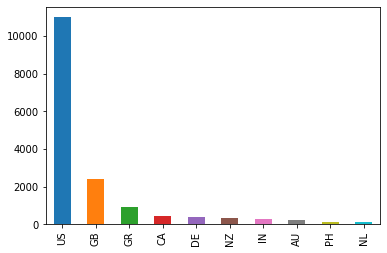

In [28]:
##1. LOCATION
## 1.1 lOCATION VARIABLE 
chart=df_new['Location'].value_counts()[:10].plot(kind='bar')

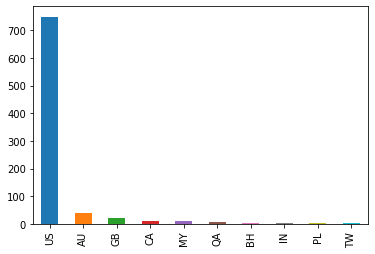

In [29]:
## 1.2 lOCATION VARIABLE : Fraud Category
chart=f['Location'].value_counts()[:10].plot(kind='bar')

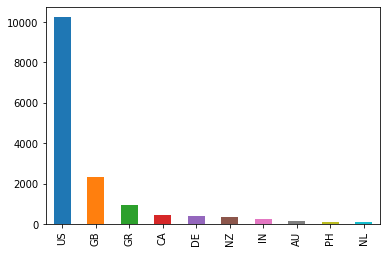

In [30]:
## 1.3 lOCATION VARIABLE : Not Fraud Category
chart=not_f['Location'].value_counts()[:10].plot(kind='bar')

[Text(0, 0, 'Other'),
 Text(0, 0, 'Full-time'),
 Text(0, 0, 'Part-time'),
 Text(0, 0, 'Contract'),
 Text(0, 0, 'Temporary')]

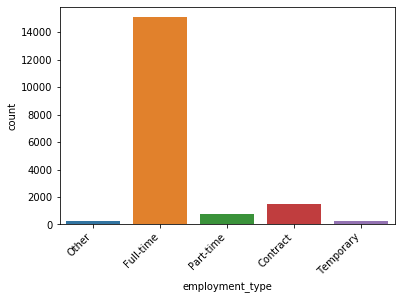

In [31]:
#2. EMPLOYMENT TYPE
#2.1
chart=sns.countplot(df_new.employment_type)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Full-time'),
 Text(0, 0, 'Contract'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Part-time'),
 Text(0, 0, 'Temporary')]

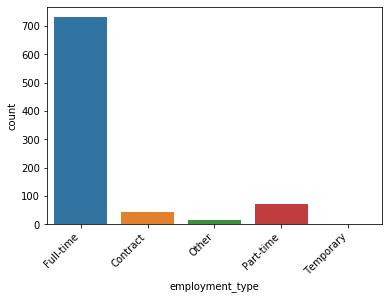

In [32]:
#2.2 Emplyment Type : Fraud Category
chart=sns.countplot(f.employment_type)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Other'),
 Text(0, 0, 'Full-time'),
 Text(0, 0, 'Part-time'),
 Text(0, 0, 'Contract'),
 Text(0, 0, 'Temporary')]

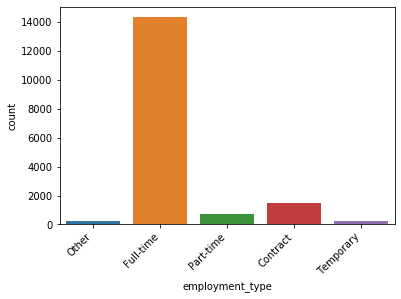

In [33]:
#2.3 Emplyment Type :Not Fraud Category
chart=sns.countplot(not_f.employment_type)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Internship'),
 Text(0, 0, 'Not Applicable'),
 Text(0, 0, 'Mid-Senior level'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Entry level'),
 Text(0, 0, 'Executive'),
 Text(0, 0, 'Director')]

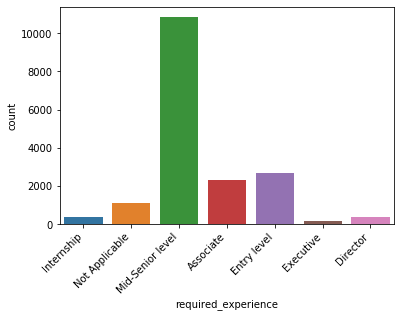

In [34]:
#3.REQUIRED EXPERIENCE
#3.1
chart=sns.countplot(df_new.required_experience)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Mid-Senior level'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Entry level'),
 Text(0, 0, 'Executive'),
 Text(0, 0, 'Internship'),
 Text(0, 0, 'Director'),
 Text(0, 0, 'Not Applicable')]

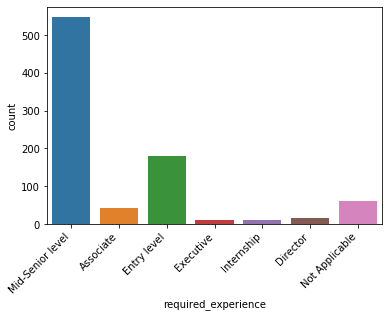

In [35]:
#3.2 REQUIRED EXPERIENCE : Fraud Category
chart=sns.countplot(f.required_experience)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'Internship'),
 Text(0, 0, 'Not Applicable'),
 Text(0, 0, 'Mid-Senior level'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Entry level'),
 Text(0, 0, 'Executive'),
 Text(0, 0, 'Director')]

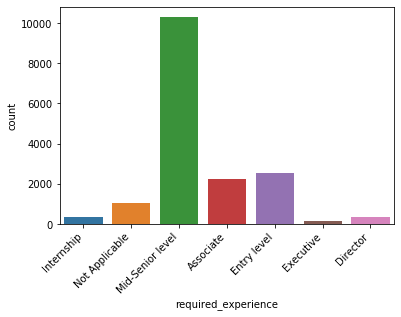

In [36]:
# 3.3 REQUIRED EXPERIENCE : Not Fraud Category
chart=sns.countplot(not_f.required_experience)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, "Bachelor's Degree"),
 Text(0, 0, "Master's Degree"),
 Text(0, 0, 'High School or equivalent'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Some College Coursework Completed'),
 Text(0, 0, 'Vocational'),
 Text(0, 0, 'Certification'),
 Text(0, 0, 'Associate Degree'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Some High School Coursework'),
 Text(0, 0, 'Vocational - Degree'),
 Text(0, 0, 'Vocational - HS Diploma')]

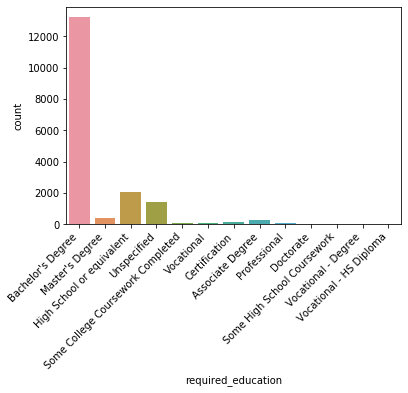

In [37]:
# 4.REQUIRED EDUCATION
# 4.1
chart=sns.countplot(df_new.required_education)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, 'High School or equivalent'),
 Text(0, 0, "Bachelor's Degree"),
 Text(0, 0, 'Certification'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, "Master's Degree"),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Associate Degree'),
 Text(0, 0, 'Some College Coursework Completed'),
 Text(0, 0, 'Some High School Coursework'),
 Text(0, 0, 'Doctorate')]

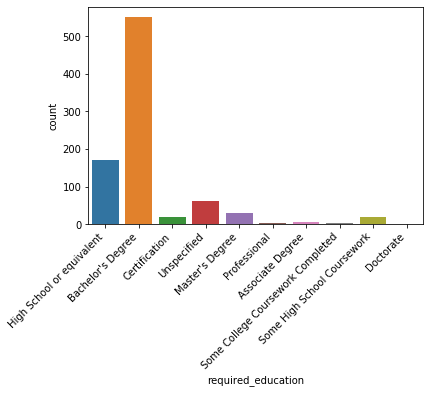

In [38]:
# 4.2 REQUIRED EDUCATION : Fraud Category
chart=sns.countplot(f.required_education)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

[Text(0, 0, "Bachelor's Degree"),
 Text(0, 0, "Master's Degree"),
 Text(0, 0, 'High School or equivalent'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Some College Coursework Completed'),
 Text(0, 0, 'Vocational'),
 Text(0, 0, 'Certification'),
 Text(0, 0, 'Associate Degree'),
 Text(0, 0, 'Professional'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Some High School Coursework'),
 Text(0, 0, 'Vocational - Degree'),
 Text(0, 0, 'Vocational - HS Diploma')]

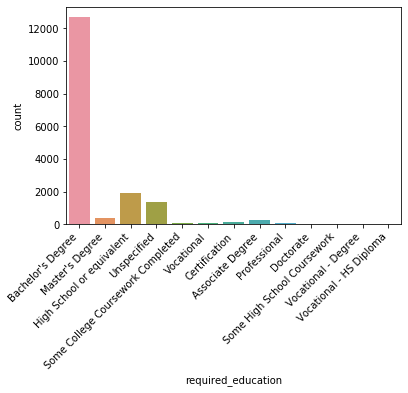

In [39]:
# 4.3 REQUIRED EDUCATION : Not Fraud Category
chart=sns.countplot(not_f.required_education)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

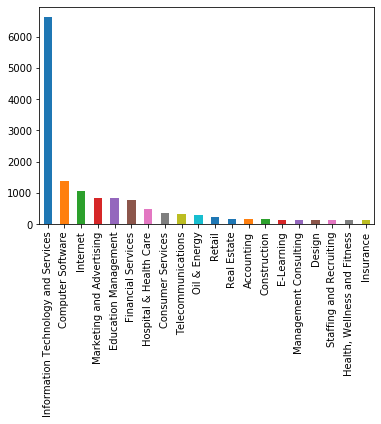

In [40]:
#5. INDUSTRY
df_new['industry'].value_counts()[:20].plot(kind='bar')

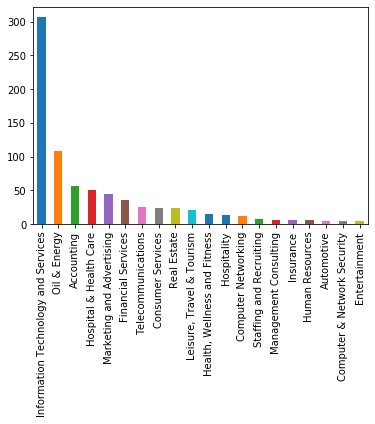

In [41]:
f['industry'].value_counts()[:20].plot(kind='bar')

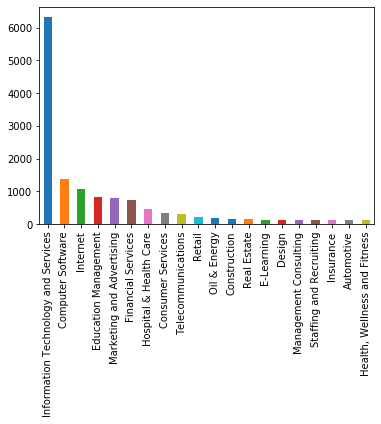

In [42]:
not_f['industry'].value_counts()[:20].plot(kind='bar')

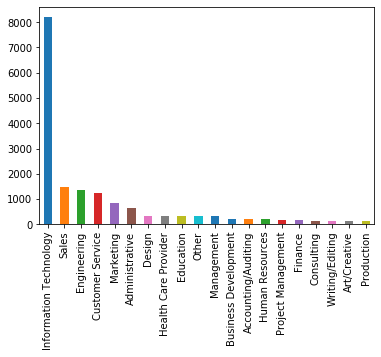

In [43]:
#FUNCTION
df_new['function'].value_counts()[:20].plot(kind='bar')

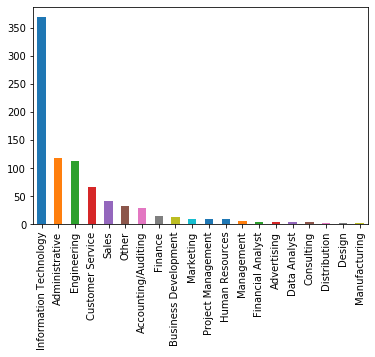

In [44]:
f['function'].value_counts()[:20].plot(kind='bar')

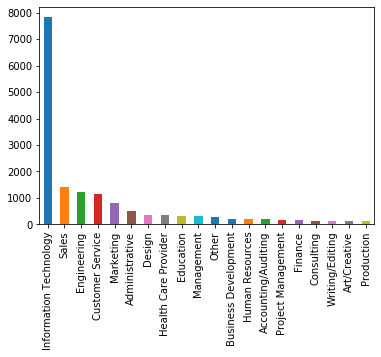

In [45]:
not_f['function'].value_counts()[:20].plot(kind='bar')

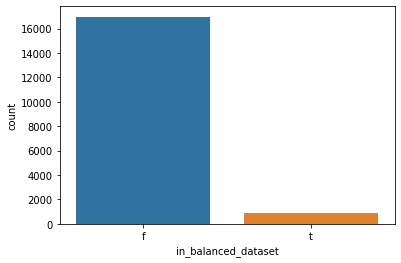

In [46]:
sns.countplot(df_new.in_balanced_dataset)

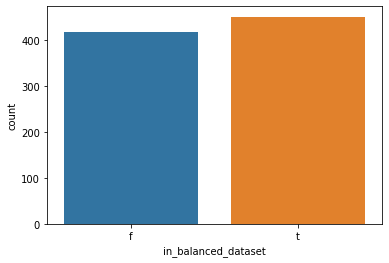

In [47]:
sns.countplot(f.in_balanced_dataset)

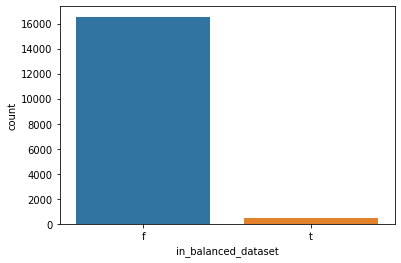

In [48]:
sns.countplot(not_f.in_balanced_dataset)

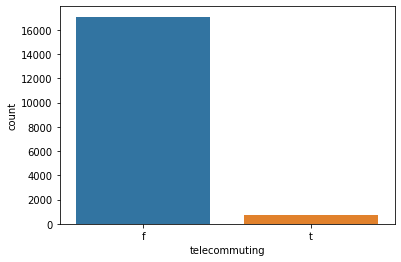

In [49]:
sns.countplot(df_new.telecommuting)

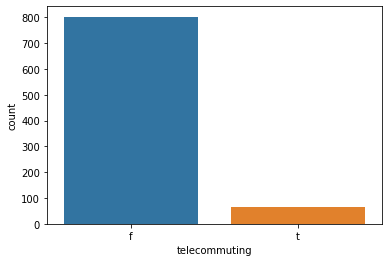

In [50]:
sns.countplot(f.telecommuting)

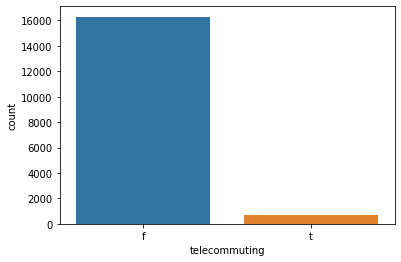

In [51]:
sns.countplot(not_f.telecommuting)

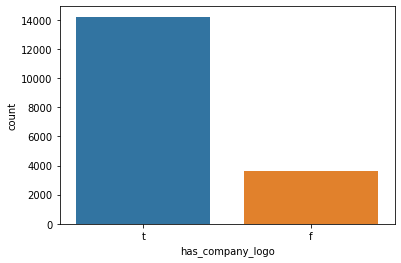

In [52]:
sns.countplot(df_new.has_company_logo)

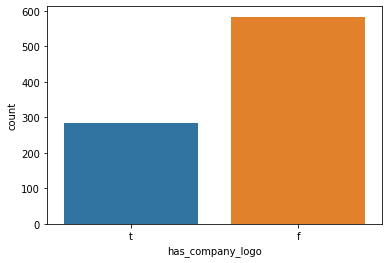

In [53]:
sns.countplot(f.has_company_logo)

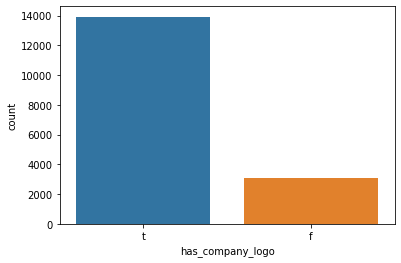

In [54]:
sns.countplot(not_f.has_company_logo)

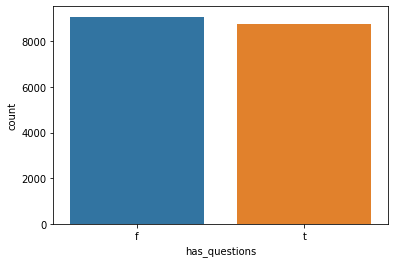

In [55]:
sns.countplot(df_new.has_questions)

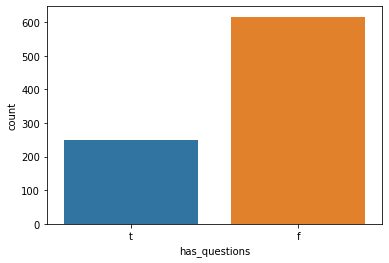

In [56]:
sns.countplot(f.has_questions)

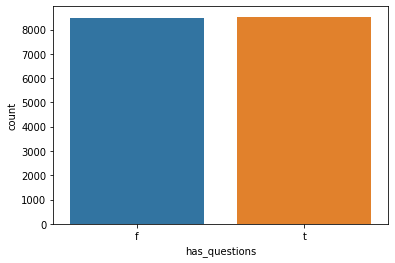

In [57]:
sns.countplot(not_f.has_questions)

## Splitting data based on the column types 
1. Droping all text type columns.

In [58]:
df_new1= df_new.drop(['company_profile', 'description','requirements','benefits'], axis = 1)

In [59]:
df_new1.shape

(17860, 12)

In [60]:
df_new1.head()

,title,Location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,in_balanced_dataset,fraudulent
0,Marketing Intern,US,f,t,f,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,f,f
1,Customer Service - Cloud Video Production,NZ,f,t,f,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),US,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,f,f
3,Account Executive - Washington DC,US,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,US,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


#Encoding all the fields values inorder to convert all the values to numerical values for easy processing

In [61]:
df_new1['title'].value_counts()

English Teacher Abroad                                                               311
Customer Service Associate                                                           146
Graduates: English Teacher Abroad (Conversational)                                   144
English Teacher Abroad                                                                95
Software Engineer                                                                     86
English Teacher Abroad (Conversational)                                               83
Customer Service Associate - Part Time                                                76
Account Manager                                                                       75
Web Developer                                                                         66
Project Manager                                                                       62
Beauty & Fragrance consultants needed                                                 60
Graduates: English Te

In [62]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['title'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: '   Electrician ',
 1: '   Environmental Technician I',
 2: '   Piping Material Engineer',
 3: '  Discipline Manager Civil, Structural, Marine, Architectural',
 4: '  FEA Senior engineer',
 5: '  Manager of Project Management Organization - Engineering',
 6: '  Mechanical Engineering Manager',
 7: '  Resources Change Management, Process Excellence and Change Enablement Manager',
 8: '  ServiceNow Consultant ',
 9: ' AUTOCAD OPERATOR',
 10: ' Account Executive/Digital Ad Sales',
 11: ' Accounting Clerk ',
 12: ' Accounting/Bookkeeping',
 13: ' Agile Business Analyst',
 14: ' Analyst Programmer (BOXI, Oracle)',
 15: ' Android Developer',
 16: ' BI Developer',
 17: ' BI Technology Intern ',
 18: ' BS37 5NZ DGV Apprenticeship available under NAS 18 year olds only!',
 19: ' BUSINESS DEVELOPMENT ASSOCIATE - AMSTERDAM, NL',
 20: ' Business Analyst (Permanent-Manager level)',
 21: ' CAD Operator',
 22: ' CARER/SENIOR CARER POSITIONS',
 23: ' CNC Programmer',
 24: ' Co-Superstar (Asst. Stor

In [63]:
df_new1['title'] = genre_labels

In [64]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['Location'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'AE',
 1: 'AL',
 2: 'AM',
 3: 'AR',
 4: 'AT',
 5: 'AU',
 6: 'BD',
 7: 'BE',
 8: 'BG',
 9: 'BH',
 10: 'BR',
 11: 'BY',
 12: 'CA',
 13: 'CH',
 14: 'CL',
 15: 'CM',
 16: 'CN',
 17: 'CO',
 18: 'CY',
 19: 'CZ',
 20: 'DE',
 21: 'DK',
 22: 'EE',
 23: 'EG',
 24: 'ES',
 25: 'FI',
 26: 'FR',
 27: 'GB',
 28: 'GH',
 29: 'GR',
 30: 'HK',
 31: 'HR',
 32: 'HU',
 33: 'ID',
 34: 'IE',
 35: 'IL',
 36: 'IN',
 37: 'IQ',
 38: 'IS',
 39: 'IT',
 40: 'JM',
 41: 'JP',
 42: 'KE',
 43: 'KH',
 44: 'KR',
 45: 'KW',
 46: 'KZ',
 47: 'LK',
 48: 'LT',
 49: 'LU',
 50: 'LV',
 51: 'MA',
 52: 'MT',
 53: 'MU',
 54: 'MX',
 55: 'MY',
 56: 'NG',
 57: 'NI',
 58: 'NL',
 59: 'NO',
 60: 'NZ',
 61: 'PA',
 62: 'PE',
 63: 'PH',
 64: 'PK',
 65: 'PL',
 66: 'PT',
 67: 'QA',
 68: 'RO',
 69: 'RS',
 70: 'RU',
 71: 'SA',
 72: 'SD',
 73: 'SE',
 74: 'SG',
 75: 'SI',
 76: 'SK',
 77: 'SV',
 78: 'TH',
 79: 'TN',
 80: 'TR',
 81: 'TT',
 82: 'TW',
 83: 'UA',
 84: 'UG',
 85: 'US',
 86: 'VI',
 87: 'VN',
 88: 'ZA',
 89: 'ZM'}

In [65]:
df_new1['Location'] = genre_labels

In [66]:
class_mapping = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['telecommuting']))}

class_mapping

{'f': 0, 't': 1}

In [67]:
df_new1['telecommuting'] = df_new1['telecommuting'].map(class_mapping)

In [68]:
class_mapping1 = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['has_company_logo']))}

class_mapping1

{'f': 0, 't': 1}

In [69]:
df_new1['has_company_logo'] = df_new1['has_company_logo'].map(class_mapping1)

In [70]:
class_mapping2 = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['has_questions']))}

class_mapping2

{'f': 0, 't': 1}

In [71]:
class_mapping2 = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['has_questions']))}

class_mapping2

{'f': 0, 't': 1}

In [72]:
df_new1['has_questions'] = df_new1['has_questions'].map(class_mapping2)

In [73]:
class_mapping3 = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['in_balanced_dataset']))}

class_mapping3

{'f': 0, 't': 1}

In [74]:
df_new1['in_balanced_dataset'] = df_new1['in_balanced_dataset'].map(class_mapping3)

In [75]:
class_mapping4 = {label:idx for idx,label in
                 enumerate(np.unique(df_new1['fraudulent']))}

class_mapping4
df_new1['fraudulent'] = df_new1['fraudulent'].map(class_mapping4)

In [76]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['employment_type'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Contract', 1: 'Full-time', 2: 'Other', 3: 'Part-time', 4: 'Temporary'}

In [77]:
df_new1['employment_type'] = genre_labels

In [78]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['required_experience'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Associate',
 1: 'Director',
 2: 'Entry level',
 3: 'Executive',
 4: 'Internship',
 5: 'Mid-Senior level',
 6: 'Not Applicable'}

In [79]:
df_new1['required_experience'] = genre_labels

In [80]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['required_education'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Associate Degree',
 1: "Bachelor's Degree",
 2: 'Certification',
 3: 'Doctorate',
 4: 'High School or equivalent',
 5: "Master's Degree",
 6: 'Professional',
 7: 'Some College Coursework Completed',
 8: 'Some High School Coursework',
 9: 'Unspecified',
 10: 'Vocational',
 11: 'Vocational - Degree',
 12: 'Vocational - HS Diploma'}

In [81]:
df_new1['required_education'] = genre_labels

In [82]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['industry'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Accounting',
 1: 'Airlines/Aviation',
 2: 'Alternative Dispute Resolution',
 3: 'Animation',
 4: 'Apparel & Fashion',
 5: 'Architecture & Planning',
 6: 'Automotive',
 7: 'Aviation & Aerospace',
 8: 'Banking',
 9: 'Biotechnology',
 10: 'Broadcast Media',
 11: 'Building Materials',
 12: 'Business Supplies and Equipment',
 13: 'Capital Markets',
 14: 'Chemicals',
 15: 'Civic & Social Organization',
 16: 'Civil Engineering',
 17: 'Commercial Real Estate',
 18: 'Computer & Network Security',
 19: 'Computer Games',
 20: 'Computer Hardware',
 21: 'Computer Networking',
 22: 'Computer Software',
 23: 'Construction',
 24: 'Consumer Electronics',
 25: 'Consumer Goods',
 26: 'Consumer Services',
 27: 'Cosmetics',
 28: 'Defense & Space',
 29: 'Design',
 30: 'E-Learning',
 31: 'Education Management',
 32: 'Electrical/Electronic Manufacturing',
 33: 'Entertainment',
 34: 'Environmental Services',
 35: 'Events Services',
 36: 'Executive Office',
 37: 'Facilities Services',
 38: 'Farming',
 39: 

In [83]:
df_new1['industry'] = genre_labels

In [84]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df_new1['function'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Accounting/Auditing',
 1: 'Administrative',
 2: 'Advertising',
 3: 'Art/Creative',
 4: 'Business Analyst',
 5: 'Business Development',
 6: 'Consulting',
 7: 'Customer Service',
 8: 'Data Analyst',
 9: 'Design',
 10: 'Distribution',
 11: 'Education',
 12: 'Engineering',
 13: 'Finance',
 14: 'Financial Analyst',
 15: 'General Business',
 16: 'Health Care Provider',
 17: 'Human Resources',
 18: 'Information Technology',
 19: 'Legal',
 20: 'Management',
 21: 'Manufacturing',
 22: 'Marketing',
 23: 'Other',
 24: 'Product Management',
 25: 'Production',
 26: 'Project Management',
 27: 'Public Relations',
 28: 'Purchasing',
 29: 'Quality Assurance',
 30: 'Research',
 31: 'Sales',
 32: 'Science',
 33: 'Strategy/Planning',
 34: 'Supply Chain',
 35: 'Training',
 36: 'Writing/Editing'}

In [85]:
df_new1['function'] = genre_labels

In [86]:
df_new1.head()

,title,Location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,in_balanced_dataset,fraudulent
0,6036,85,0,1,0,2,4,1,58,22,0,0
1,2182,60,0,1,0,1,6,1,75,7,0,0
2,1763,85,0,1,0,1,5,1,58,18,0,0
3,300,85,0,1,0,1,5,1,22,31,0,0
4,975,85,0,1,1,1,5,1,51,16,0,0


In [87]:
df_new1.shape

(17860, 12)

In [88]:
df_new1.dtypes

title                  int64
Location               int64
telecommuting          int64
has_company_logo       int64
has_questions          int64
employment_type        int64
required_experience    int64
required_education     int64
industry               int64
function               int64
in_balanced_dataset    int64
fraudulent             int64
dtype: object

In [89]:
## Feature Selection Techniques

In [90]:
# split into input (X) and output (y) variables
X = df_new1.iloc[:, :-1]
y = df_new1.iloc[:,-1]

In [91]:
# 1. Univariate Statistics 

In [92]:
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split

# get deterministic random numbers 
rng = np.random.RandomState(42) 
noise = rng.normal(size=(len(X), 50)) 

# add noise features to the data 
# the first 30 features are from the dataset, the next 50 are noise 
X_w_noise = np.hstack([X, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features 
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train) 

# transform training set 
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (8930, 61)
X_train_selected.shape: (8930, 30)


In [93]:
from sklearn.linear_model import LogisticRegression
# transform test data 
X_test_selected = select.transform(X_test)
lr = LogisticRegression() 
lr.fit(X_train, y_train) 
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 
lr.fit(X_train_selected, y_train) 
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.966
Score with only selected features: 0.965


2. Model-Based Feature Selection

In [94]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")
select.fit(X_train, y_train) 
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

C:\Users\bency\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


X_train.shape: (8930, 61)
X_train_l1.shape: (8930, 31)


In [95]:
X_test_l1 = select.transform(X_test) 
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test) 
print("Test score: {:.3f}".format(score))

Test score: 0.966


3. Iterative Feature Selection 

In [96]:
from sklearn.feature_selection import RFE 
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train, y_train) 
X_train_rfe= select.transform(X_train) 
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test) 
print("Test score: {:.3f}".format(score))
print("Test score {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.967
Test score 0.968


4. Pearson’s correlation

In [97]:
def cor_selector(X, y,num_feats):

    cor_list = []

    feature_name = X.columns.tolist()

    # calculate the correlation with y for each feature

    for i in X.columns.tolist():

        cor = np.corrcoef(X[i], y)[0, 1]

        cor_list.append(cor)

    # replace NaN with 0

    cor_list = [0 if np.isnan(i) else i for i in cor_list]

    # feature name

    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()

    # feature selection? 0 for not select, 1 for select

    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y,5)

print(str(len(cor_feature)), 'selected features')

5 selected features


5.Chi-Squared

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

5 selected features
